In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/car_age_price.csv')
df.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [7]:
df.shape

(112, 2)

In [8]:
df.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


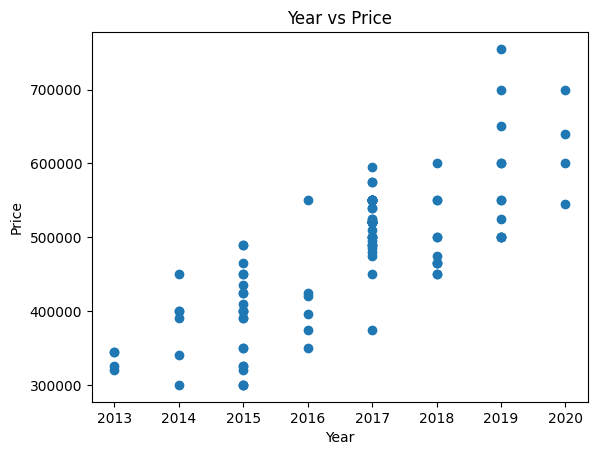

In [9]:
plt.scatter(df["Year"], df["Price"])
plt.xlabel("Year")
plt.ylabel("Price")
plt.title("Year vs Price")
plt.show()

In [10]:
df.isna().sum()

Year     0
Price    0
dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error

In [14]:
X = df[["Year"]]
y = df["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
linear_rg = LinearRegression()
linear_rg.fit(X_train, y_train)
linear_rg_pd = linear_rg.predict(X_test)
linear_rg_rmse = mean_squared_error(y_test, linear_rg_pd, squared=False)

print("Linear Regression :", linear_rg_rmse)

Linear Regression : 65779.22359552195


In [20]:
df.columns

Index(['Year', 'Price'], dtype='object')

In [22]:
lasso_rg = Lasso(alpha=0.1)
lasso_rg.fit(X_train, y_train)
lasso_rg_pd = lasso_rg.predict(X_test)
lasso_rg_rmse = mean_squared_error(y_test, lasso_rg_pd, squared=False)

print("Lasso Regression :", lasso_rg_rmse)

Lasso Regression : 65779.18826038415


In [24]:
year_2022 = [[22]]
linear_rg_price_2022 = linear_rg.predict(year_2022)
lasso_rg_price_2022 = lasso_rg.predict(year_2022)

print("Predicted Price using Linear Regression for 2022 model:", linear_rg_price_2022[0])
print("Predicted Price using Lasso Regression for 2022 model:", lasso_rg_price_2022[0])

Predicted Price using Linear Regression for 2022 model: -94473534.00020817
Predicted Price using Lasso Regression for 2022 model: -94473451.78266029


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
